# Exploratory Data Anaysis (EDA) for Immo Charlie
## Part 2/3: Multivariate analysis

In [31]:
#Setting up shop, insalling libraries & dataviz style sheets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None) # displays all columns in our dfs so we don't get the ... in the middle

## Okay Data, let's explore feature relationships! 

- scatter plots
- pair plots
- correlation matrix
- heatmap
- groupby

In [32]:
# Let's load you up
df = pd.read_csv('data/raw/dataset_2.csv')

# What do you look like?
print("Number of observations (rows):", df.shape[0])
print("Number of features (columns):", df.shape[1])

df.head(5)

Number of observations (rows): 72986
Number of features (columns): 32


,ID,Street,HouseNumber,Box,Floor,City,PostalCode,Region,District,Province,PropertyType,PropertySubType,Price,SaleType,ConstructionYear,BedroomCount,LivingArea,KitchenType,Furnished,Fireplace,Terrace,TerraceArea,Garden,GardenArea,Facades,SwimmingPool,Condition,EPCScore,Latitude,Longitude,PropertyUrl,Property url
0,11161571,Zonstraat,"1, V1",NaN,1.0,Lier,2500,FLANDERS,Mechelen,Antwerp,APARTMENT,APARTMENT,299000.0,residential_sale,1938.0,2,76.0,INSTALLED,NaN,1,1.0,17.0,1.0,NaN,2.0,NaN,JUST_RENOVATED,B,51.140213,4.562034,NaN,https://www.immoweb.be/en/classified/apartment...
1,11161295,Mechelsesteenweg,19,NaN,3.0,Antwerp,2018,FLANDERS,Antwerp,Antwerp,APARTMENT,TRIPLEX,649000.0,residential_sale,1929.0,3,222.0,USA_HYPER_EQUIPPED,NaN,1,1.0,7.0,NaN,NaN,2.0,NaN,GOOD,B,51.210229,4.408275,NaN,https://www.immoweb.be/en/classified/triplex/f...
2,11156375,Harmoniestraat,34,4,4.0,ANTWERPEN 2018,2018,FLANDERS,Antwerp,Antwerp,APARTMENT,PENTHOUSE,285000.0,residential_sale,1974.0,2,96.0,INSTALLED,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,F,51.202969,4.409758,NaN,https://www.immoweb.be/en/classified/penthouse...
3,11081531,Luitenant Lippenslaan,37,203,2.0,Antwerpen,2140,FLANDERS,Antwerp,Antwerp,APARTMENT,APARTMENT,234900.0,residential_sale,1972.0,2,96.0,INSTALLED,NaN,0,1.0,4.0,NaN,NaN,2.0,0.0,GOOD,C,51.209161,4.449845,NaN,https://www.immoweb.be/en/classified/apartment...
4,11147112,Potvlietlaan,"1, 9",NaN,9.0,Berchem,2600,FLANDERS,Antwerp,Antwerp,APARTMENT,APARTMENT,189000.0,residential_sale,1976.0,2,90.0,SEMI_EQUIPPED,NaN,1,1.0,12.0,NaN,NaN,2.0,NaN,GOOD,C,51.204408,4.442760,NaN,https://www.immoweb.be/en/classified/apartment...


## Price distribution per region for all properties in our dataset

## Price distribution per province
### Plot type: boxplot

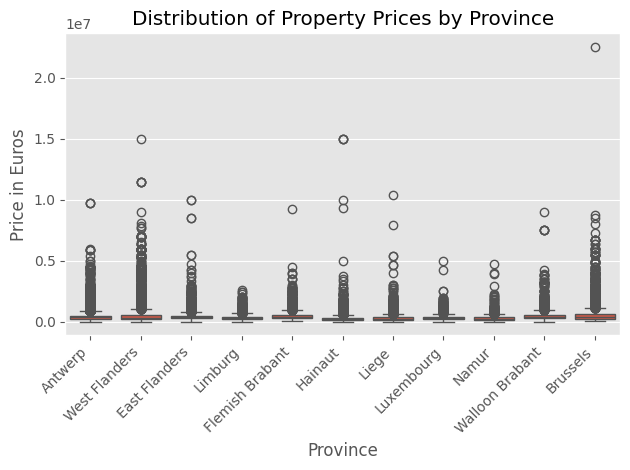

In [33]:

# Ensure that 'Price' is in numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Create a box plot
sns.boxplot(x='Province', y='Price', data=df)

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Euros')
plt.title('Distribution of Property Prices by Province')

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Format the X-axis label from scientific notation to million EUR units

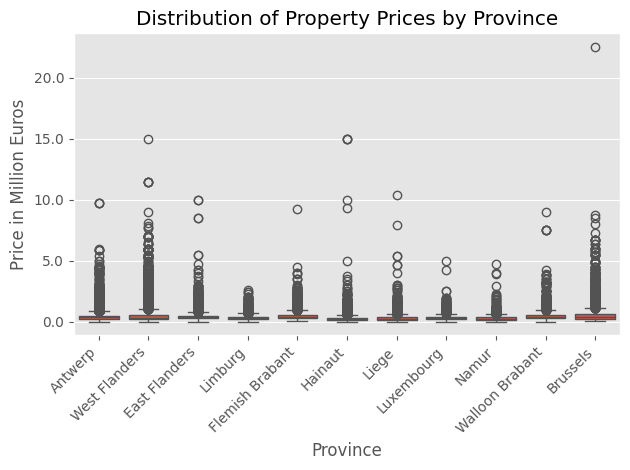

In [34]:
# Ensure that 'Price' is in numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Create a box plot or violin plot
sns.boxplot(x='Province', y='Price', data=df)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Province')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Handle the Outliers 

In [35]:
# Ensure that 'Price' is in numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# BAD WAY of creating a new df apparently, kept hitting a warning message:
# df_2 = df_1[df_1['Price'] < 7000000]

#This is the GOOD WAY to create a new df with a subset of the original df, by using the .copy() method
df = df[df['Price'] <= 9000000].copy()


print("Number of observations rows without outliers:", df.shape[0])
print("Number of columns without outliers:", df.shape[1])


Number of observations rows without outliers: 72958
Number of columns without outliers: 32


## Re-plot the price distribution per region for all properties in our dataset, without the outliers

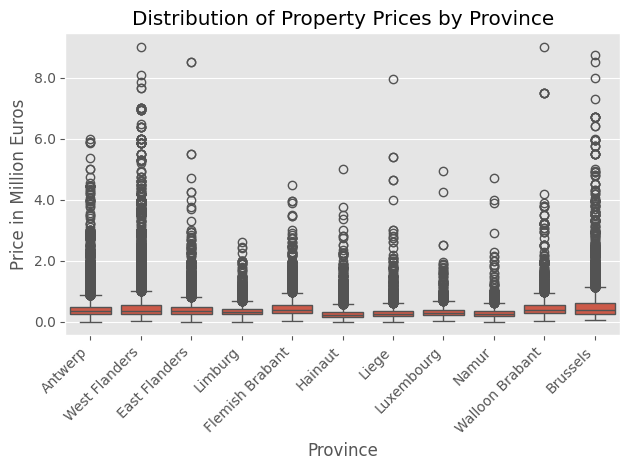

In [36]:
# Create a box plot (or violin plot, commented)
sns.boxplot(x='Province', y='Price', data=df)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Province')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Province')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Distribution of prices per main region in Belgium

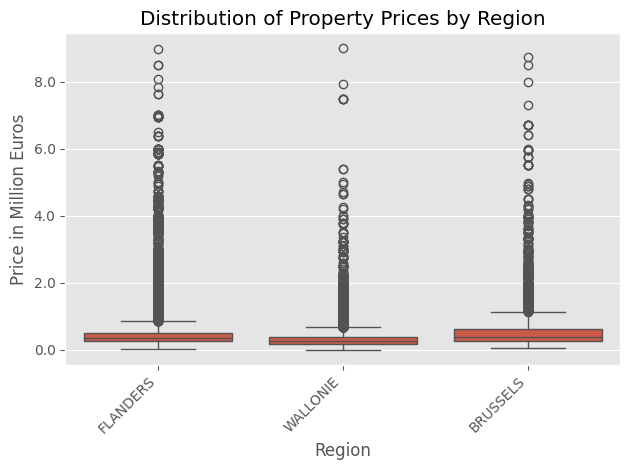

In [37]:
# Create a box plot
sns.boxplot(x='Region', y='Price', data=df)  # For box plot
# sns.violinplot(x='Province', y='Price', data=df)  # For violin plot, uncomment this line and comment the box plot line above if you prefer a violin plot

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')

# Set the labels and title
plt.xlabel('Region')
plt.ylabel('Price in Million Euros')
plt.title('Distribution of Property Prices by Region')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

## Subset our data set into two groups: apartments and houses

### First check how many unique values there are in the type column

In [38]:
# Display all unique values in the 'Type' column
unique_types = df['PropertyType'].unique()
print("Unique values in 'Type' column:", unique_types)

# Get the count of unique values in the 'Type' column
unique_type_count = df['PropertyType'].nunique()
print("Number of unique values in 'Type' column:", unique_type_count)


Unique values in 'Type' column: ['APARTMENT' 'HOUSE']
Number of unique values in 'Type' column: 2


## Proportion of houses and apartments in our data set

In [39]:
type_proportions = df['PropertyType'].value_counts(normalize=True)

print("Proportion of houses and apartments:")
print(type_proportions)

Proportion of houses and apartments:
PropertyType
HOUSE        0.609268
APARTMENT    0.390732
Name: proportion, dtype: float64


## Create two separate data frames, one for houses, one for apartments

In [40]:
# Create a DataFrame for houses
df_houses = df[df['PropertyType'] == 'HOUSE'].copy()

# Create a DataFrame for apartments
df_apartments = df[df['PropertyType'] == 'APARTMENT'].copy()

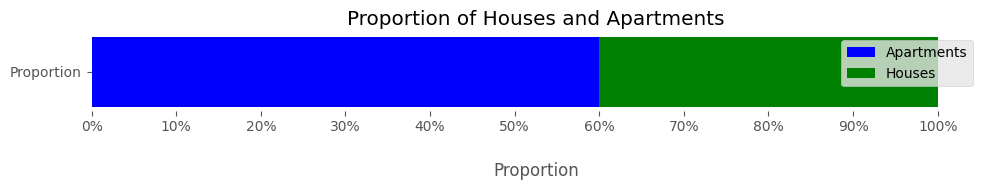

In [41]:
# Calculate the proportion of houses and apartments in the dataset
type_proportions = df['PropertyType'].value_counts(normalize=True)


# import matplotlib.pyplot as plt

proportions = [0.60, 0.40]  # Proportions for apartments and houses respectively
categories = ['Apartments', 'Houses']

# Create a stacked horizontal bar plot with a thinner bar
plt.figure(figsize=(10, 2), frameon=False)
plt.barh('Proportion', proportions[0], color='blue', label=categories[0], height=0.2)  # Adjust the height for a thinner bar
plt.barh('Proportion', proportions[1], left=proportions[0], color='green', label=categories[1], height=0.2)  # Adjust the height for a thinner bar
plt.xlabel('Proportion', labelpad=20)  # Increase the space between the x-axis label and the graph
plt.title('Proportion of Houses and Apartments')
plt.legend()

# Set the background color to white
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Remove the border of the plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Set the x-axis labels to percentages
plt.xticks(np.arange(0, 1.1, 0.1), ['{}%'.format(int(x*100)) for x in np.arange(0, 1.1, 0.1)])

# Show the plot with adjusted layout to make room for the axis labels and title
plt.tight_layout()

plt.show()

## The proportion of subtypes of houses

In [42]:
print(df_houses['PropertySubType'].value_counts(normalize=True).round(4))


PropertySubType
HOUSE                   0.7463
VILLA                   0.0889
APARTMENT_BLOCK         0.0528
MIXED_USE_BUILDING      0.0410
EXCEPTIONAL_PROPERTY    0.0155
TOWN_HOUSE              0.0118
MANSION                 0.0115
BUNGALOW                0.0087
FARMHOUSE               0.0065
COUNTRY_COTTAGE         0.0063
MANOR_HOUSE             0.0040
CHALET                  0.0028
OTHER_PROPERTY          0.0026
CASTLE                  0.0013
Name: proportion, dtype: float64


## Distribution of prices per main region in Belgium, separated for houses and apartments

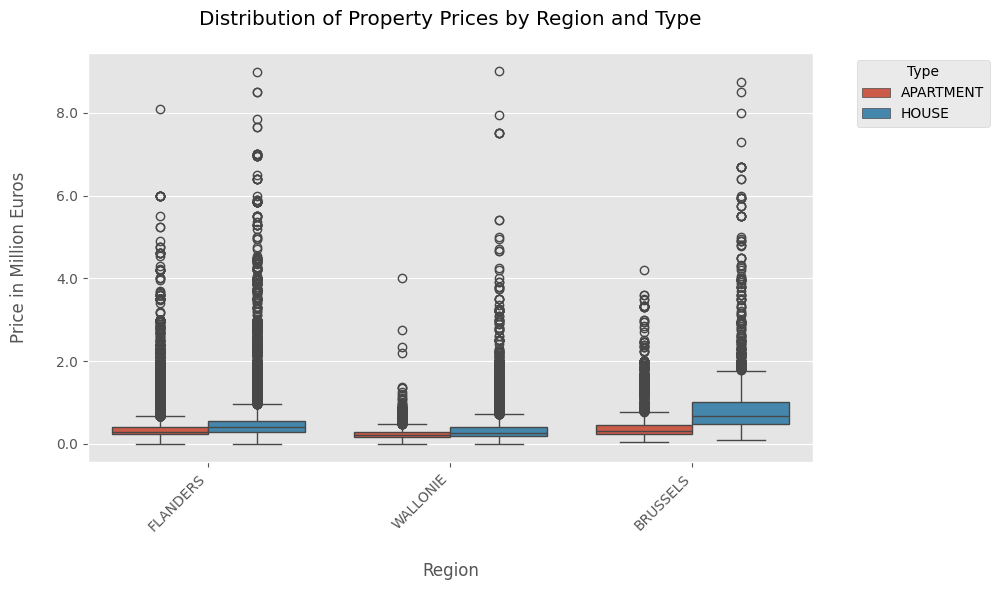

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set the figure size to make the plot wider
plt.figure(figsize=(12, 6))  # Increase the width as needed

# Ensure that 'Price' is in numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Create a box plot with 'Region' on the x-axis, 'Price' on the y-axis, and 'Type' as the hue
sns.boxplot(x='Region', y='Price', hue='PropertyType', data=df)

# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')


# Set the labels and title
plt.xlabel('Region', labelpad=20)
plt.ylabel('Price in Million Euros', labelpad=20)
plt.title('Distribution of Property Prices by Region and Type', pad=20)

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

# Move the legend outside the plot
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with adjusted layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rect parameter as needed to fit your plot and legend
plt.show()

## Price segmentation for houses and apartments in Belgium (binned prices)

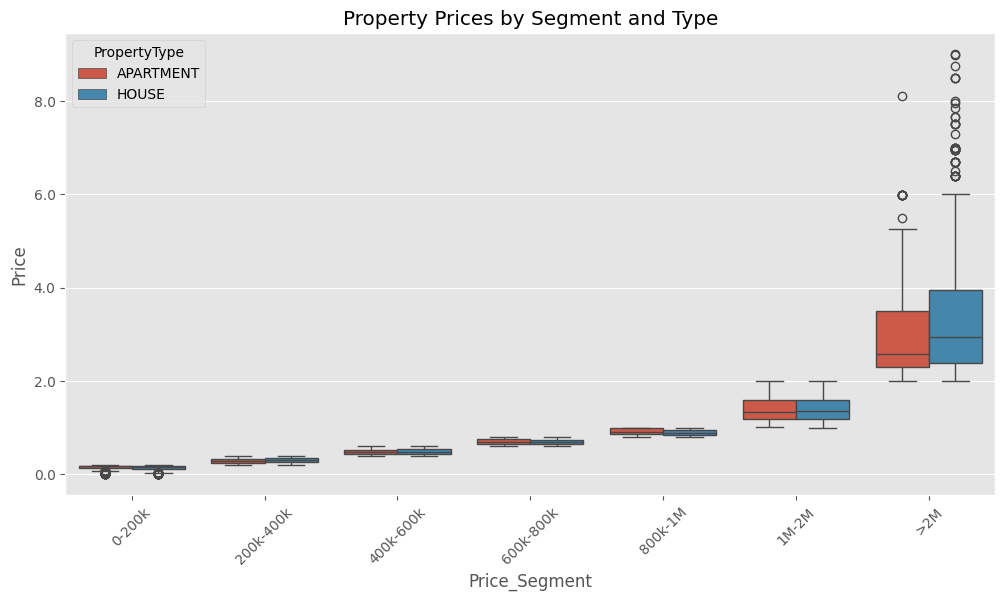

In [44]:
# Define the edges of our bins - we can update these as needed
bins = [0, 200000, 400000, 600000, 800000, 1000000, 2000000, float('inf')]

# Define the labels for the bins
labels = ['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k-1M', '1M-2M', '>2M']

# Ensure that 'Price' is in numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Create a new column 'Price_Segment' using pd.cut
df['Price_Segment'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)

# Plot the distribution:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Price_Segment', y='Price', hue='PropertyType', data=df)
plt.xticks(rotation=45)
plt.title('Property Prices by Segment and Type')

# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

plt.show()

## Price segmentation 

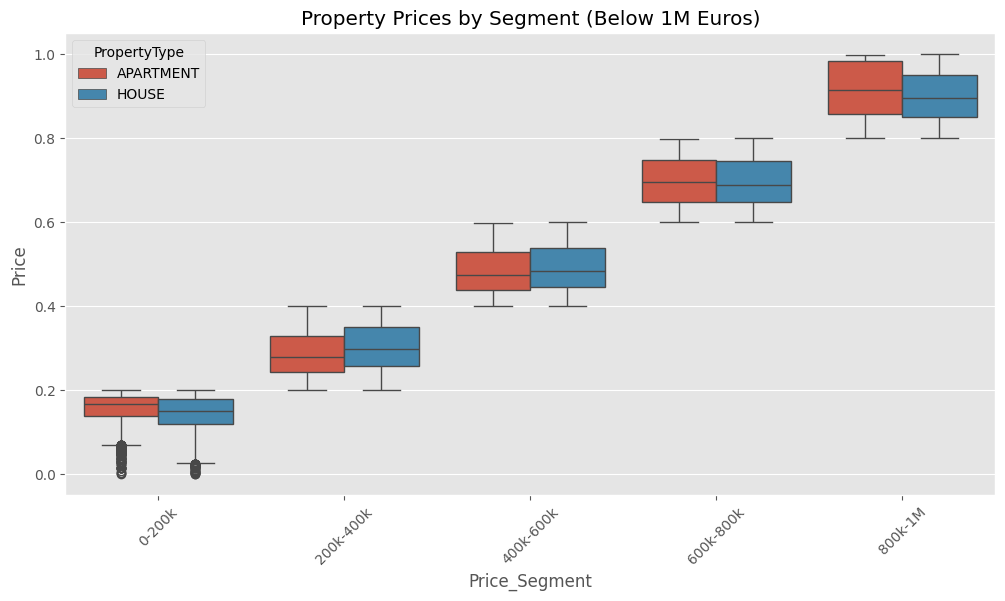

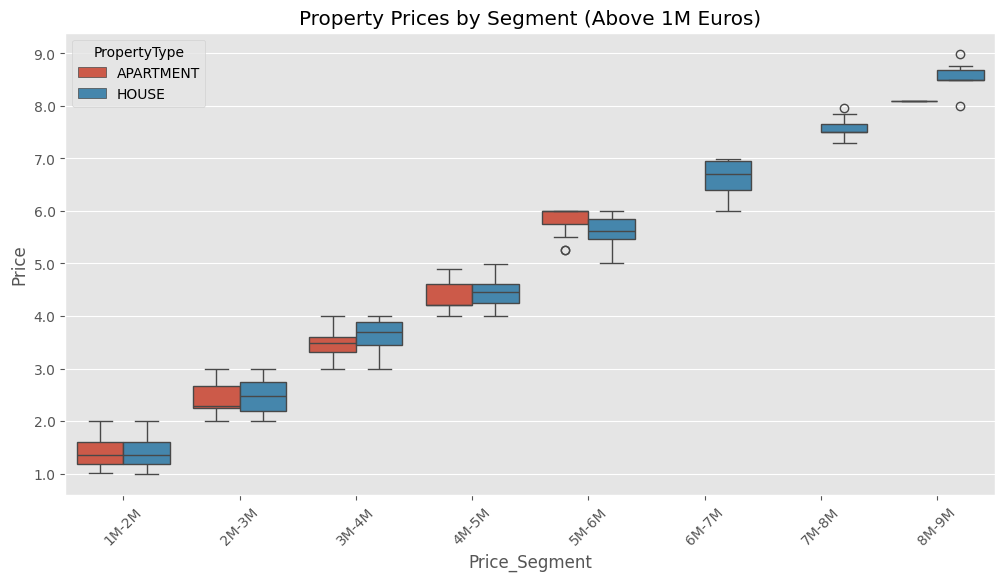

In [45]:
# Bins and labels for properties below 1 million Euros
bins_below_1m = [0, 200000, 400000, 600000, 800000, 1000000]
labels_below_1m = ['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k-1M']

# Bins and labels for properties above 1 million Euros
max_price = df['Price'].max()
bins_above_1m = list(range(1000000, int(max_price) + 1000000, 1000000))
labels_above_1m = [f'{i//1000000}M-{(i+1000000)//1000000}M' for i in bins_above_1m[:-1]]

# Ensure that 'Price' is in numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


# Separate the DataFrame into two based on price (use .copy() methd to avoid the SettingWithCopyWarning)
df_below_1m = df[df['Price'] < 1000000].copy()
df_above_1m = df[df['Price'] >= 1000000].copy()

# Create the 'Price_Segment' column for each DataFrame
df_below_1m['Price_Segment'] = pd.cut(df_below_1m['Price'], bins=bins_below_1m, labels=labels_below_1m, right=False)
df_above_1m['Price_Segment'] = pd.cut(df_above_1m['Price'], bins=bins_above_1m, labels=labels_above_1m, right=False)

# Plot for properties below 1 million Euros
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_Segment', y='Price', hue='PropertyType', data=df_below_1m)
plt.xticks(rotation=45)
plt.title('Property Prices by Segment (Below 1M Euros)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))
plt.show()
#save boxplot in the graphs folder
#plt.savefig('graphs/boxplot1.png')

# Plot for properties above 1 million Euros
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_Segment', y='Price', hue='PropertyType', data=df_above_1m)
plt.xticks(rotation=45)
plt.title('Property Prices by Segment (Above 1M Euros)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))
plt.show()
#save boxplot in the graphs folder
#plt.savefig('graphs/boxplot2.png')


## Proportion of properties by price segment (overall)

/var/folders/5h/_vtcyyv117xbrdwp8624nv_c0000gp/T/ipykernel_6271/2378288636.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=price_segment_proportions.index, y=price_segment_proportions.values, palette="Blues_d")


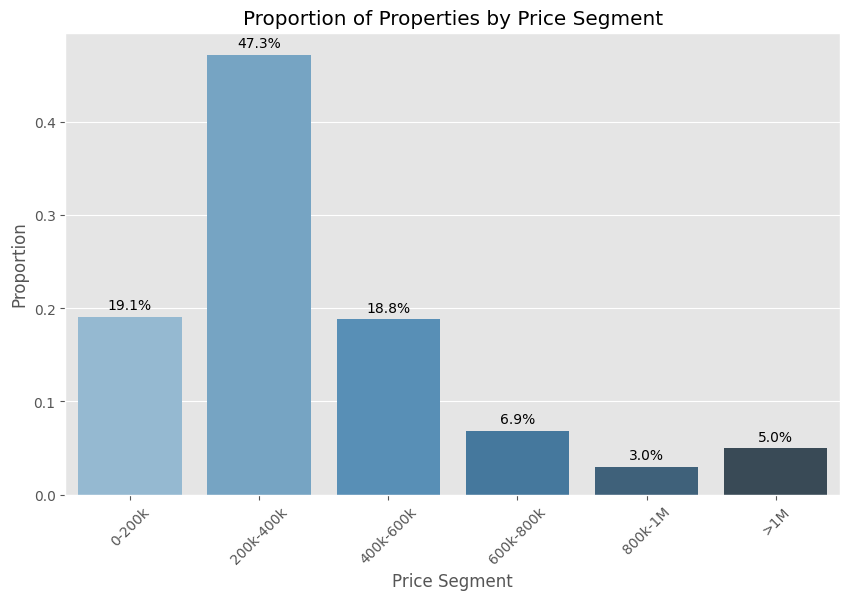

In [46]:
# Ensure that 'Price' is in numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Define bins and labels for all properties
bins = [0, 200000, 400000, 600000, 800000, 1000000, float('inf')]
labels = ['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k-1M', '>1M']

# Create 'Price_Segment' for all properties
df['Price_Segment'] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)

# Calculate the proportion of each price segment
price_segment_proportions = df['Price_Segment'].value_counts(normalize=True).sort_index()

# Plot the proportions
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=price_segment_proportions.index, y=price_segment_proportions.values, palette="Blues_d")

plt.title('Proportion of Properties by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate labels to improve readability

# Annotate each bar with the percentage value
for bar in bars.patches:
    # The text annotation for each bar should be its height (proportion) formatted as a percentage
    bars.annotate(format(bar.get_height(), '.1%'),  # Format the proportion as a percentage with one decimal place
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position for the text (x, y)
                   ha='center',  # Center the text horizontally
                   va='center',  # Center the text vertically within the bar
                   size=10,  # Font size
                   xytext=(0, 8),  # Position offset for the text (to be slightly above the bar)
                   textcoords='offset points')  # Use offset points for positioning the text

plt.show()

## Proportion of property types by price segment

/var/folders/5h/_vtcyyv117xbrdwp8624nv_c0000gp/T/ipykernel_6271/1324372209.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_type_counts = df.groupby(['Price_Segment', 'PropertyType']).size().reset_index(name='counts')


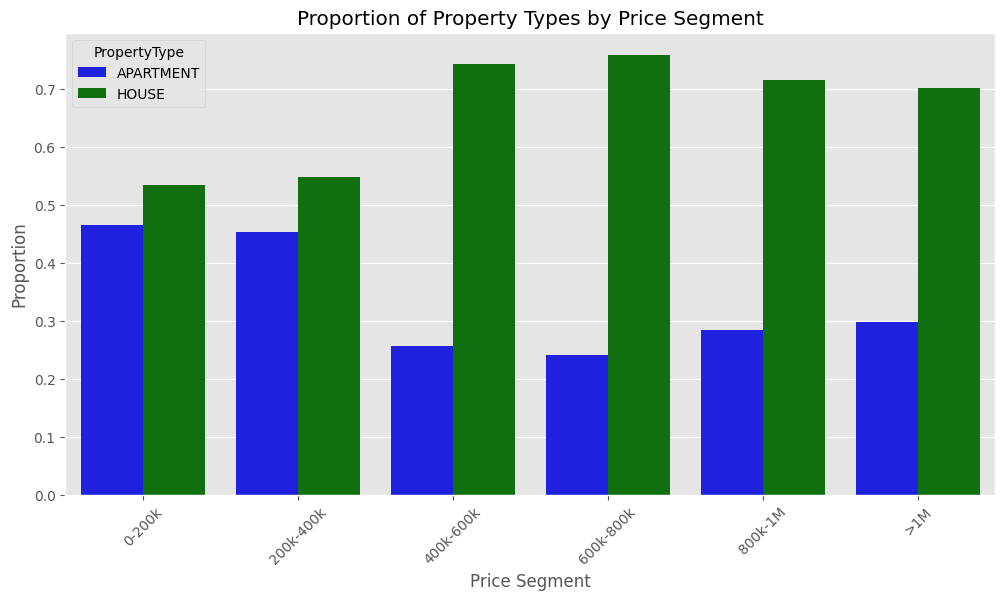

In [47]:
# Calculate the count of each combination of 'Price_Segment' and 'Type'
segment_type_counts = df.groupby(['Price_Segment', 'PropertyType']).size().reset_index(name='counts')

# Calculate the total count of properties in each 'Price_Segment'
segment_counts = df['Price_Segment'].value_counts().reset_index()
segment_counts.columns = ['Price_Segment', 'total_counts']

# Merge to get total counts in each segment for normalization
segment_type_counts = pd.merge(segment_type_counts, segment_counts, on='Price_Segment')

# Calculate the proportion of each type within each price segment
segment_type_counts['proportion'] = segment_type_counts['counts'] / segment_type_counts['total_counts']

# Now plot using sns.barplot with the 'hue' parameter
custom_palette = {'HOUSE': 'green', 'APARTMENT': 'blue'}
plt.figure(figsize=(12, 6))
sns.barplot(data=segment_type_counts, x='Price_Segment', y='proportion', hue='PropertyType', palette=custom_palette)

plt.title('Proportion of Property Types by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

plt.show()

## Proportion of properties by price segment < 1M EUR

/var/folders/5h/_vtcyyv117xbrdwp8624nv_c0000gp/T/ipykernel_6271/1190543748.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=price_segment_proportions.index, y=price_segment_proportions.values, palette="Blues_d")


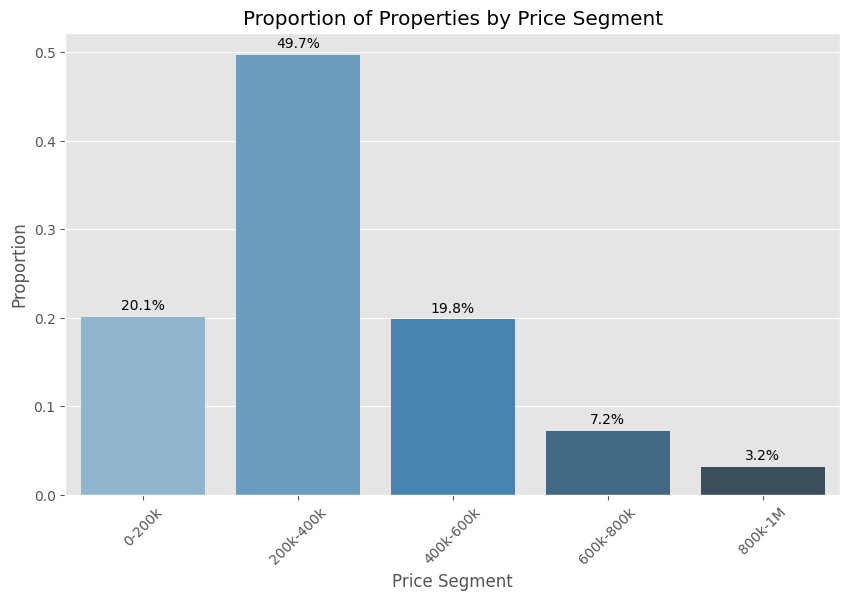

In [48]:
df_below_1m = df[df['Price'] < 1000000].copy()
df_above_1m = df[df['Price'] >= 1000000].copy()


# Ensure that 'Price' is in numeric format
df_below_1m['Price'] = pd.to_numeric(df_below_1m['Price'], errors='coerce')

# Define bins and labels for all properties below 1 million Euros
bins_below_1m = [0, 200000, 400000, 600000, 800000, 1000000] #
labels_below_1m = ['0-200k', '200k-400k', '400k-600k', '600k-800k', '800k-1M']

# Create 'Price_Segment' for all properties
df_below_1m['Price_Segment'] = pd.cut(df_below_1m['Price'], bins=bins_below_1m, labels=labels_below_1m, right=False)

# Calculate the proportion of each price segment
price_segment_proportions = df_below_1m['Price_Segment'].value_counts(normalize=True).sort_index()

# Plot the proportions
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=price_segment_proportions.index, y=price_segment_proportions.values, palette="Blues_d")

plt.title('Proportion of Properties by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate labels to improve readability

# Annotate each bar with the percentage value
for bar in bars.patches:
    # The text annotation for each bar should be its height (proportion) formatted as a percentage
    bars.annotate(format(bar.get_height(), '.1%'),  # Format the proportion as a percentage with one decimal place
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position for the text (x, y)
                   ha='center',  # Center the text horizontally
                   va='center',  # Center the text vertically within the bar
                   size=10,  # Font size
                   xytext=(0, 8),  # Position offset for the text (to be slightly above the bar)
                   textcoords='offset points')  # Use offset points for positioning the text

plt.show()

## Deepdive into the 200k-400k price segment

/var/folders/5h/_vtcyyv117xbrdwp8624nv_c0000gp/T/ipykernel_6271/2797136891.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  region_bars = sns.barplot(x=region_counts.index, y=region_counts.values, palette="coolwarm")


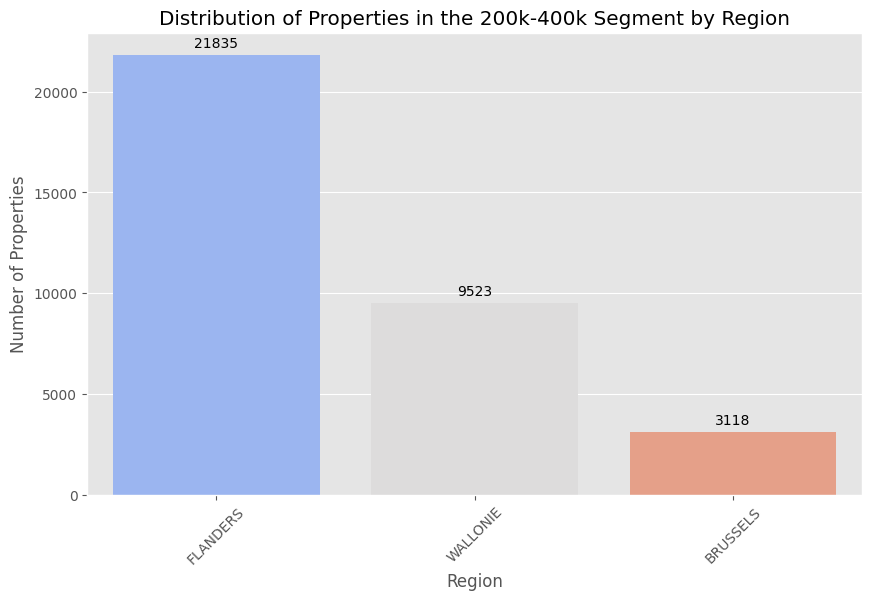

In [49]:
# Filter the DataFrame for properties in the '200k-400k' price segment
properties_200k_400k = df[df['Price_Segment'] == '200k-400k']

# Count the number of properties in each region within this price segment
region_counts = properties_200k_400k['Region'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
region_bars = sns.barplot(x=region_counts.index, y=region_counts.values, palette="coolwarm")

plt.title('Distribution of Properties in the 200k-400k Segment by Region')
plt.xlabel('Region')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)  # Rotate labels to improve readability

# Annotate each bar with the count value
for bar in region_bars.patches:
    region_bars.annotate(format(bar.get_height(), '.0f'),  # Format the count as a whole number
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position for the text (x, y)
                         ha='center',  # Center the text horizontally
                         va='center',  # Center the text vertically within the bar
                         size=10,  # Font size
                         xytext=(0, 8),  # Position offset for the text (to be slightly above the bar)
                         textcoords='offset points')  # Use offset points for positioning the text

plt.show()

Region
BRUSSELS    293190.950289
FLANDERS    302721.859721
WALLONIE    288404.234275
Name: Price, dtype: float64


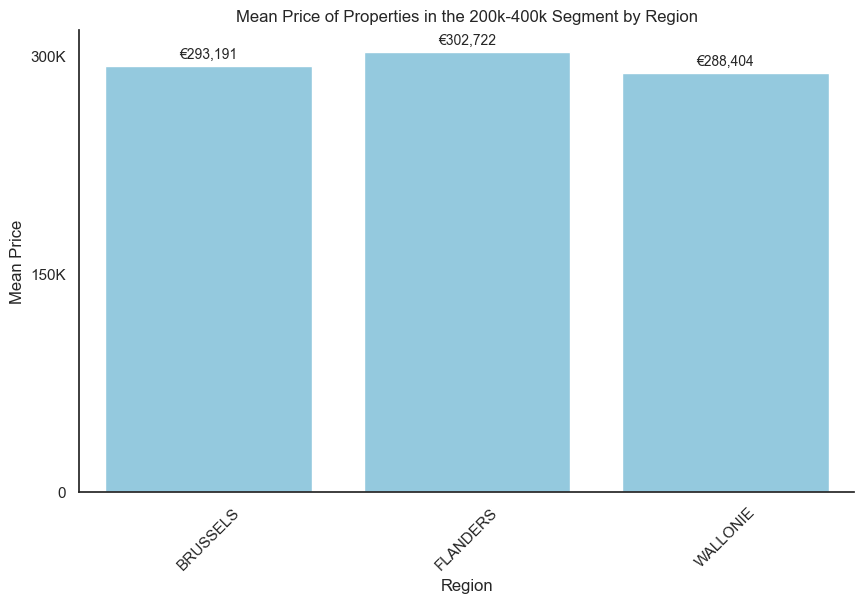

In [50]:
# Set the style of the seaborn plot to remove grid lines
sns.set(style="white")


# Calculate the mean price for each region within the '200k-400k' price segment
mean_prices_by_region = properties_200k_400k.groupby('Region')['Price'].mean()

# Print the mean prices for inspection
print(mean_prices_by_region)

#plot the mean prices for a visual comparison
plt.figure(figsize=(10, 6))
mean_price_bars = sns.barplot(x=mean_prices_by_region.index, y=mean_prices_by_region.values, color="skyblue")

plt.title('Mean Price of Properties in the 200k-400k Segment by Region')
plt.xlabel('Region')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)  # Rotate labels to improve readability

# Set Y-axis labels manually
plt.yticks([0, 150000, 300000], ['0', '150K', '300K'])

# Annotate each bar with the mean price value, formatted as requested
for bar in mean_price_bars.patches:
    # Format the mean price as a rounded integer with the Euro sign and a comma
    annotation = f'€{int(round(bar.get_height())):,}'
    mean_price_bars.annotate(annotation,
                             (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                             ha='center',
                             va='center',
                             size=10,
                             xytext=(0, 8),
                             textcoords='offset points')

# Remove the top and right spines
sns.despine()

# Remove grid lines (by not specifying them to begin with in sns.set)
plt.grid(False)

plt.show()

## Calculate Mean and Median Prices for properties within the '200k-400k' price segment for each region

In [51]:
# Calculate the mean price for each region within the '200k-400k' price segment
mean_prices_by_region = properties_200k_400k.groupby('Region')['Price'].mean()

# Calculate the median price for each region within the '200k-400k' price segment
median_prices_by_region = properties_200k_400k.groupby('Region')['Price'].median()

# Print the mean and median prices for inspection
print("Mean Prices by Region:\n", mean_prices_by_region)
print("\nMedian Prices by Region:\n", median_prices_by_region)

Mean Prices by Region:
 Region
BRUSSELS    293190.950289
FLANDERS    302721.859721
WALLONIE    288404.234275
Name: Price, dtype: float64

Median Prices by Region:
 Region
BRUSSELS    288298.5
FLANDERS    299000.0
WALLONIE    280000.0
Name: Price, dtype: float64


## Distribution of prices within the 200k-400k price segment per region

/var/folders/5h/_vtcyyv117xbrdwp8624nv_c0000gp/T/ipykernel_6271/219627436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Price', data=properties_200k_400k, palette="coolwarm")


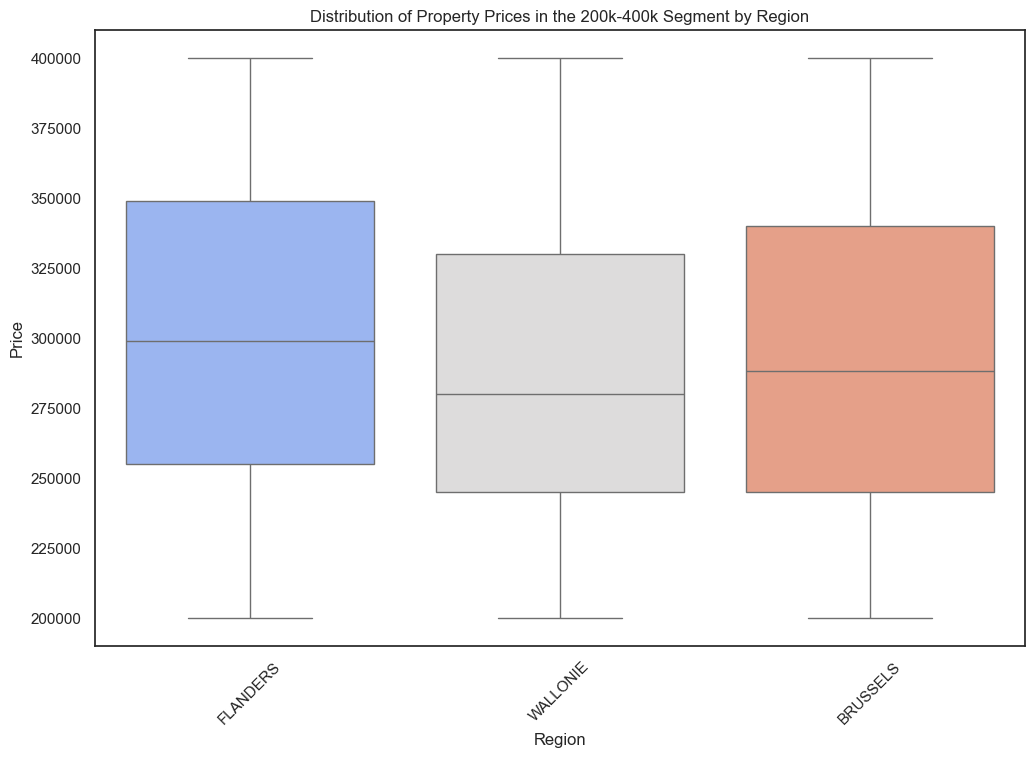

In [52]:
# Plot the distribution of prices within the '200k-400k' segment for each region using a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Price', data=properties_200k_400k, palette="coolwarm")
plt.title('Distribution of Property Prices in the 200k-400k Segment by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

## Compare the mean and median prices directly in a bar chart. This comparison can highlight the skewness of the price distribution within each region.

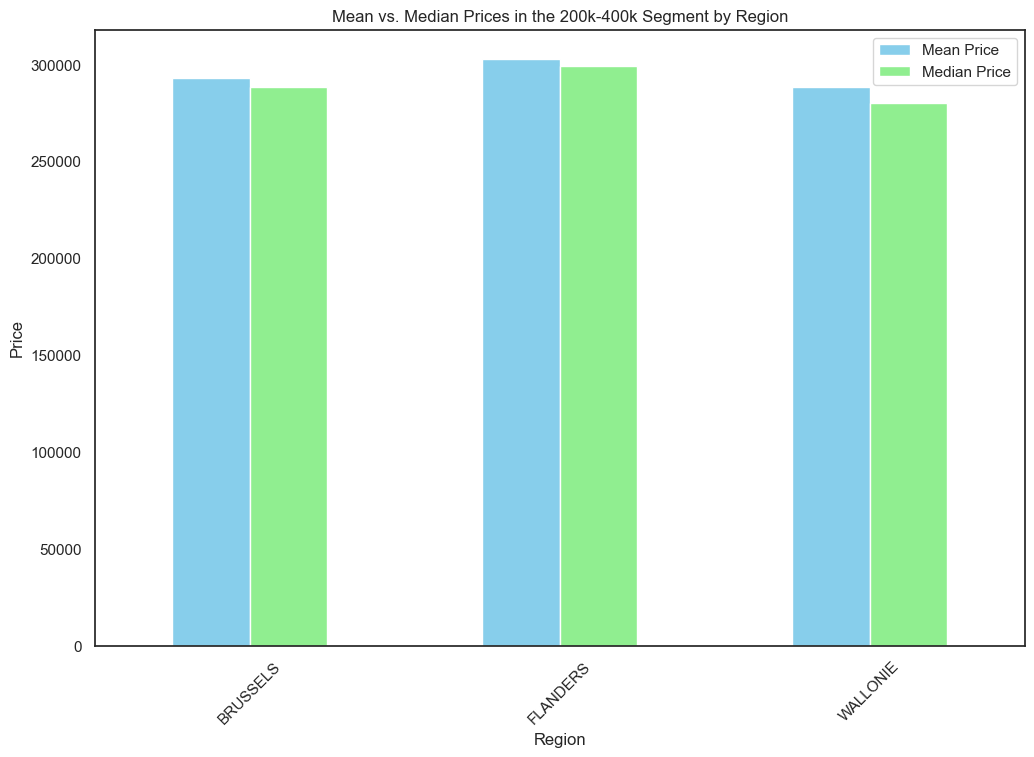

In [53]:
# Combine mean and median prices into a single DataFrame for plotting
prices_comparison = pd.DataFrame({'Mean Price': mean_prices_by_region, 'Median Price': median_prices_by_region})

# Plot the mean and median prices for each region
prices_comparison.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'lightgreen'])
plt.title('Mean vs. Median Prices in the 200k-400k Segment by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

## The average price for an apartment in the mid-range market segment

In [30]:
# Filter the DataFrame for properties in the '200k-400k' price segment and of the "Apartment" type
apartments_200k_400k = properties_200k_400k[properties_200k_400k['PropertyType'] == 'APARTMENT']

# Calculate the mean price for apartments within the '200k-400k' price segment
mean_price_apartments = apartments_200k_400k['Price'].mean()
median_price_apartments = apartments_200k_400k['Price'].median()

print(f"Mean Price for Apartments in the 200k-400k Segment: €{mean_price_apartments:,.2f}")
print(f"Median Price for Apartments in the 200k-400k Segment: €{median_price_apartments:,.2f}")

NameError: name 'properties_200k_400k' is not defined

## Properties over 1M EUR

### Proportion of properties per price segment, for properties > 1 million EUR 
- 70% are between 1 and 2 million EUR
- 15% are between 2 and 3 million EUR
- 15% are over 3 million EUR


/var/folders/5h/_vtcyyv117xbrdwp8624nv_c0000gp/T/ipykernel_4767/3257068139.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_above = sns.barplot(x=price_segment_proportions_above.index, y=price_segment_proportions_above.values, palette="Blues_d")


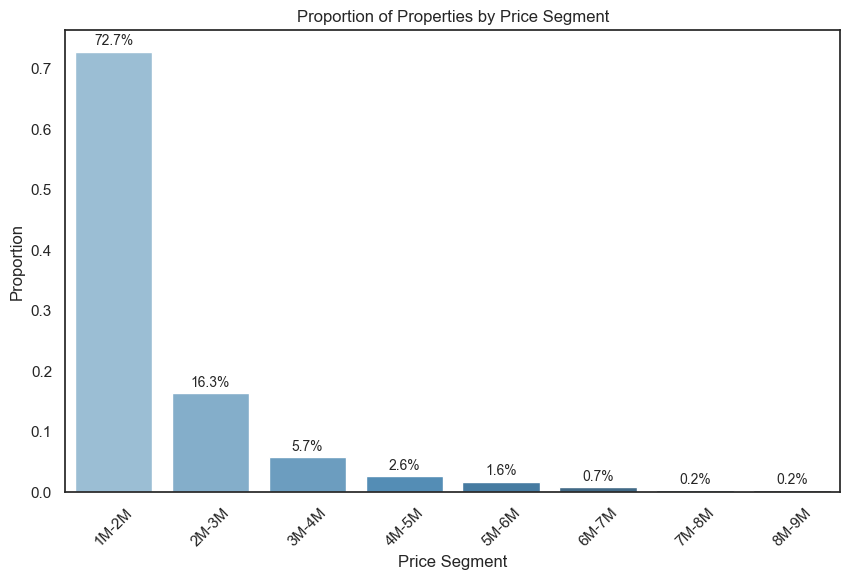

In [ ]:
df_above_1m['Price'] = pd.to_numeric(df_above_1m['Price'], errors='coerce')

# Define bins and labels for all properties above 1 million Euros
# bins_above_1m = [1000000, 2000000, 3000000, 4000000] #
# labels_above_1m = ['1M-2M', '2M-3M', '3M-4M']

# Version 2: Define bins and labels for all properties above 1 million Euros
max_price = df['Price'].max()
bins_above_1m = list(range(1000000, int(max_price) + 1000000, 1000000))
labels_above_1m = [f'{i//1000000}M-{(i+1000000)//1000000}M' for i in bins_above_1m[:-1]]

# Ensure that 'Price' is in numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
# df_above_1m = df[df['Price'] >= 1000000].copy()

# Create 'Price_Segment' for all properties
df_above_1m['Price_Segment'] = pd.cut(df_above_1m['Price'], bins=bins_above_1m, labels=labels_above_1m, right=False)

# Calculate the proportion of each price segment
price_segment_proportions_above = df_above_1m['Price_Segment'].value_counts(normalize=True).sort_index()

# Plot the proportions
plt.figure(figsize=(10, 6))
bars_above = sns.barplot(x=price_segment_proportions_above.index, y=price_segment_proportions_above.values, palette="Blues_d")

plt.title('Proportion of Properties by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate labels to improve readability

# Annotate each bar with the percentage value
for bar in bars_above.patches:
    # The text annotation for each bar should be its height (proportion) formatted as a percentage
    bars_above.annotate(format(bar.get_height(), '.1%'),  # Format the proportion as a percentage with one decimal place
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position for the text (x, y)
                   ha='center',  # Center the text horizontally
                   va='center',  # Center the text vertically within the bar
                   size=10,  # Font size
                   xytext=(0, 8),  # Position offset for the text (to be slightly above the bar)
                   textcoords='offset points')  # Use offset points for positioning the text

plt.show()


/var/folders/5h/_vtcyyv117xbrdwp8624nv_c0000gp/T/ipykernel_4767/2747963085.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars_above = sns.barplot(x=price_segment_proportions_above.index, y=price_segment_proportions_above.values, palette="Blues_d")


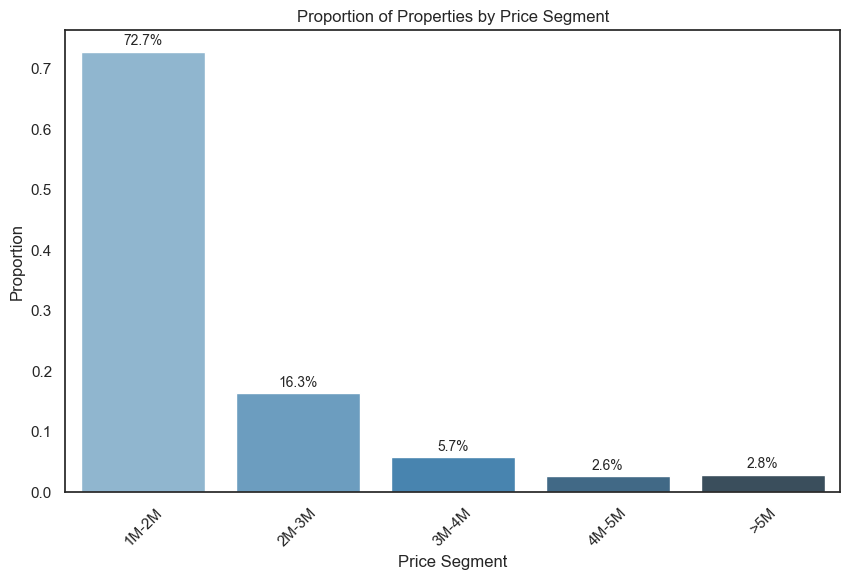

In [ ]:
# Okay, so let's bin all properties above 5 mil EUR together
df_above_1m['Price'] = pd.to_numeric(df_above_1m['Price'], errors='coerce')

# Define bins and labels for all properties above 1 million Euros
bins_above_1m = [1000000, 2000000, 3000000, 4000000, 5000000, float('inf')] #
labels_above_1m = ['1M-2M', '2M-3M', '3M-4M', '4M-5M', '>5M']


# Ensure that 'Price' is in numeric format
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Create 'Price_Segment' for all properties
df_above_1m['Price_Segment'] = pd.cut(df_above_1m['Price'], bins=bins_above_1m, labels=labels_above_1m, right=False)

# Calculate the proportion of each price segment
price_segment_proportions_above = df_above_1m['Price_Segment'].value_counts(normalize=True).sort_index()

# Plot the proportions
plt.figure(figsize=(10, 6))
bars_above = sns.barplot(x=price_segment_proportions_above.index, y=price_segment_proportions_above.values, palette="Blues_d")

plt.title('Proportion of Properties by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotate labels to improve readability

# Annotate each bar with the percentage value
for bar in bars_above.patches:
    # The text annotation for each bar should be its height (proportion) formatted as a percentage
    bars_above.annotate(format(bar.get_height(), '.1%'),  # Format the proportion as a percentage with one decimal place
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position for the text (x, y)
                   ha='center',  # Center the text horizontally
                   va='center',  # Center the text vertically within the bar
                   size=10,  # Font size
                   xytext=(0, 8),  # Position offset for the text (to be slightly above the bar)
                   textcoords='offset points')  # Use offset points for positioning the text

plt.show()


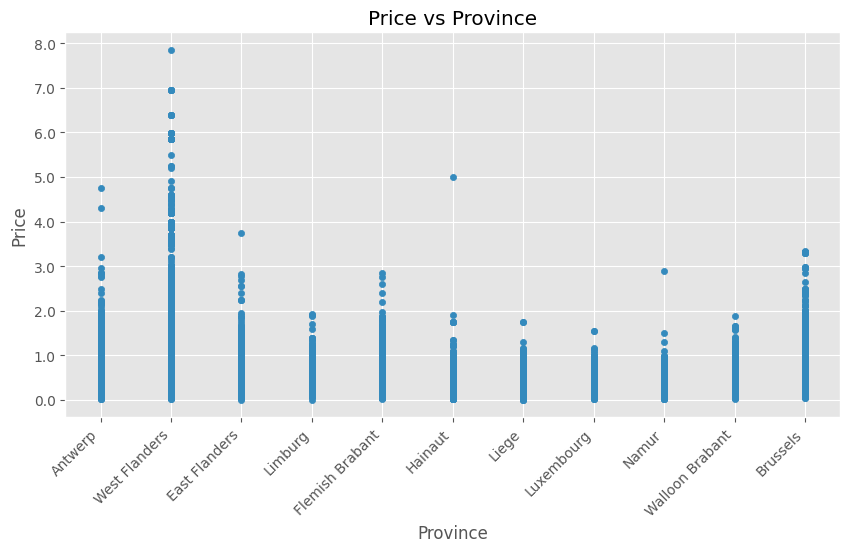

In [ ]:
# Price versus Province scatter plot
ax = df.plot(kind='scatter',
             x='Province', y='Price', figsize=(10, 5), title='Price vs Province')
# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')
# Format the y-axis to show prices in millions with one decimal place
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

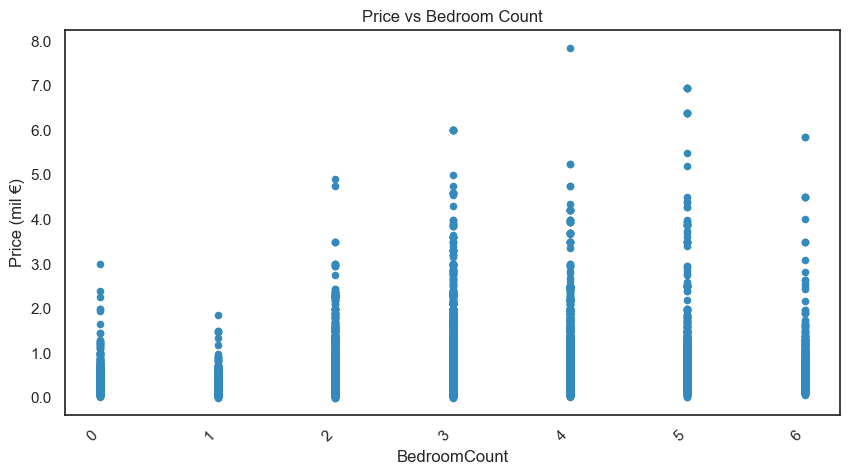

In [67]:
#remove outliers for BedroomCount, remove all rows with Bedroom count bigger than 8
df = df[df['BedroomCount'] < 8]


# Price versus Bedroom count scatter plot
ax = df.plot(kind='scatter',
             x='BedroomCount', y='Price', figsize=(10, 5), title='Price vs Bedroom Count')
# Improve readability by rotating the x labels
plt.xticks(rotation=45, ha='right')
# Format the y-axis to show prices in millions with one decimal place
ax.set_ylabel('Price (mil €)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))
plt.show()


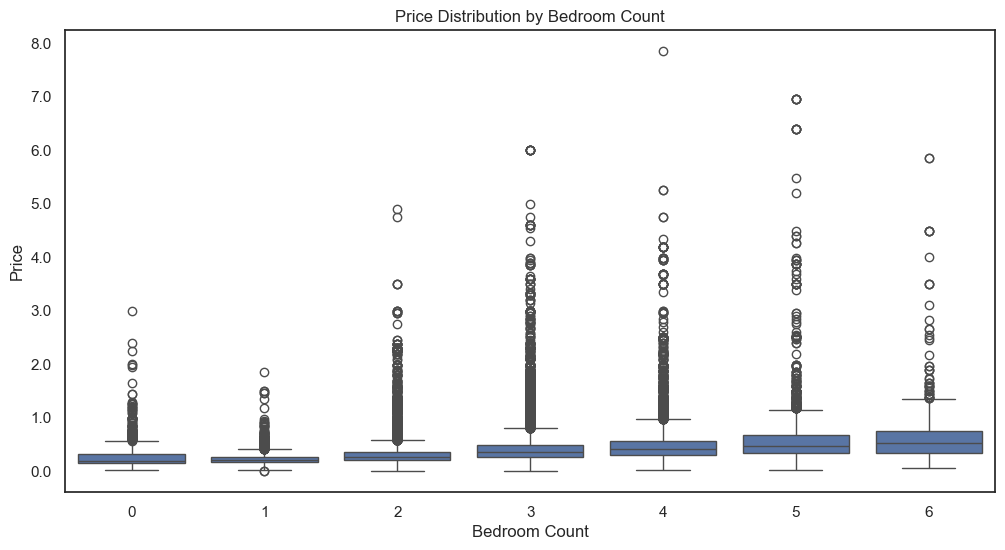

In [69]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='BedroomCount', y='Price', data=df)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))
plt.title('Price Distribution by Bedroom Count')
plt.xlabel('Bedroom Count')
plt.ylabel('Price')

plt.show()

# How many observations have a BedroomCount bigger than 7?
#print("Number of observations with BedroomCount > 6:", df[df['BedroomCount'] > 7].shape[0])

Text(0.5, 0, 'Living Area in m²')

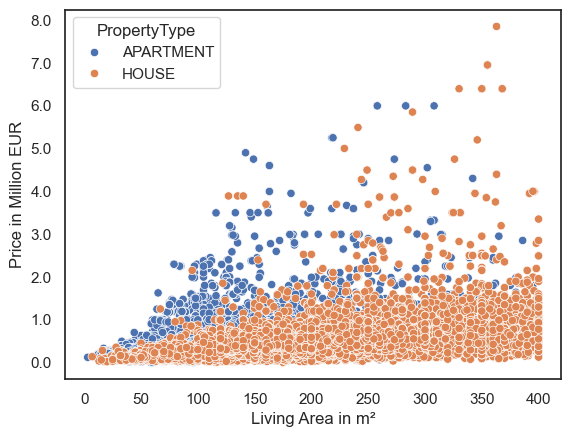

In [70]:
# remove outliers for LivingArea, remove all rows with LivingArea > 400
df = df[df['LivingArea'] <= 400]

sns.scatterplot(data=df,
                x='LivingArea',
                y='Price',
                hue='PropertyType')

#format y-axis to show price in million EUR instead of scientific notation
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/1e6)))

#set y label and x label
plt.ylabel('Price in Million EUR')
plt.xlabel('Living Area in m²')


In [71]:
df.head(5)

,ID,Street,HouseNumber,Box,Floor,City,PostalCode,Region,District,Province,PropertyType,PropertySubType,Price,SaleType,ConstructionYear,BedroomCount,LivingArea,KitchenType,Furnished,Fireplace,Terrace,TerraceArea,Garden,GardenArea,Facades,SwimmingPool,Condition,EPCScore,Latitude,Longitude,PropertyUrl,Property url,Price_Segment
0,11161571,Zonstraat,"1, V1",NaN,1.0,Lier,2500,FLANDERS,Mechelen,Antwerp,APARTMENT,APARTMENT,299000.0,residential_sale,1938.0,2,76.0,INSTALLED,NaN,1,1.0,17.0,1.0,NaN,2.0,NaN,JUST_RENOVATED,B,51.140213,4.562034,NaN,https://www.immoweb.be/en/classified/apartment...,200k-400k
1,11161295,Mechelsesteenweg,19,NaN,3.0,Antwerp,2018,FLANDERS,Antwerp,Antwerp,APARTMENT,TRIPLEX,649000.0,residential_sale,1929.0,3,222.0,USA_HYPER_EQUIPPED,NaN,1,1.0,7.0,NaN,NaN,2.0,NaN,GOOD,B,51.210229,4.408275,NaN,https://www.immoweb.be/en/classified/triplex/f...,600k-800k
2,11156375,Harmoniestraat,34,4,4.0,ANTWERPEN 2018,2018,FLANDERS,Antwerp,Antwerp,APARTMENT,PENTHOUSE,285000.0,residential_sale,1974.0,2,96.0,INSTALLED,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,GOOD,F,51.202969,4.409758,NaN,https://www.immoweb.be/en/classified/penthouse...,200k-400k
3,11081531,Luitenant Lippenslaan,37,203,2.0,Antwerpen,2140,FLANDERS,Antwerp,Antwerp,APARTMENT,APARTMENT,234900.0,residential_sale,1972.0,2,96.0,INSTALLED,NaN,0,1.0,4.0,NaN,NaN,2.0,0.0,GOOD,C,51.209161,4.449845,NaN,https://www.immoweb.be/en/classified/apartment...,200k-400k
4,11147112,Potvlietlaan,"1, 9",NaN,9.0,Berchem,2600,FLANDERS,Antwerp,Antwerp,APARTMENT,APARTMENT,189000.0,residential_sale,1976.0,2,90.0,SEMI_EQUIPPED,NaN,1,1.0,12.0,NaN,NaN,2.0,NaN,GOOD,C,51.204408,4.442760,NaN,https://www.immoweb.be/en/classified/apartment...,0-200k


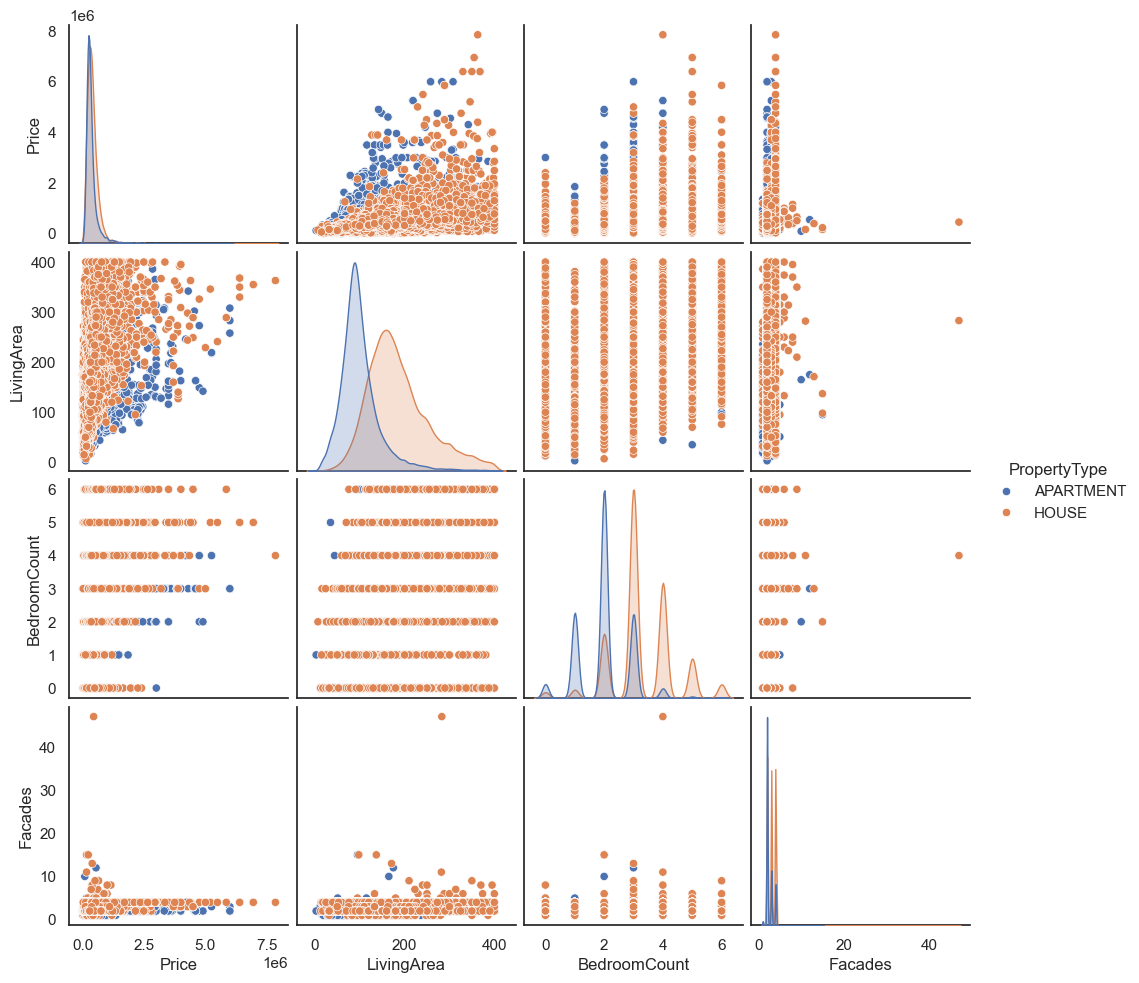

In [72]:
sns.pairplot(df, vars= ['Price', 'LivingArea', 'BedroomCount', 'Facades'],
             hue='PropertyType')
plt.show()

In [73]:
#correlation on just the numerical features, drop the nulls and the categorical features
df[['Price', 'LivingArea', 'BedroomCount', 'Facades']].dropna().corr()


,Price,LivingArea,BedroomCount,Facades
Price,1.000000,0.421767,0.291702,0.164301
LivingArea,0.421767,1.000000,0.676930,0.303144
BedroomCount,0.291702,0.676930,1.000000,0.241437
Facades,0.164301,0.303144,0.241437,1.000000


<Axes: >

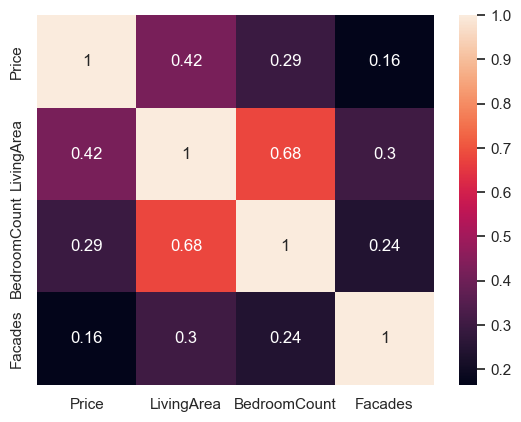

In [74]:
df_corr = df[['Price', 'LivingArea', 'BedroomCount', 'Facades']].dropna().corr()
sns.heatmap(df_corr, annot=True)